In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.io
from scipy.io import loadmat
import PIL
from PIL import Image
import matplotlib.cm as cm
import fnmatch
import os

%matplotlib inline

# TRANCOS_v3

In [3]:
trancos_test = pd.read_csv('./TRANCOS_v3/image_sets/test.txt', header=None)
trancos_train = pd.read_csv('./TRANCOS_v3/image_sets/training.txt', header=None)
trancos_trainval = pd.read_csv('./TRANCOS_v3/image_sets/trainval.txt', header=None)
trancos_val = pd.read_csv('./TRANCOS_v3/image_sets/validation.txt', header=None)

In [4]:
print("# of test data")
print(str(trancos_test.count())+'\n')
print("# of train data")
print(str(trancos_train.count())+'\n')
print("# of train+val data")
print(str(trancos_trainval.count())+'\n')
print("# of validation data")
print(str(trancos_val.count())+'\n')

# of test data
0    421
dtype: int64

# of train data
0    403
dtype: int64

# of train+val data
0    823
dtype: int64

# of validation data
0    420
dtype: int64



In [56]:
# loading the image
img = PIL.Image.open("./TRANCOS_v3/images/image-1-000001.jpg")
  
# fetching the dimensions
wid, hgt = img.size
  
# displaying the dimensions
print(str(wid) + "x" + str(hgt))

640x480


In [19]:
images = loadmat('./TRANCOS_v3/images/image-1-000001mask.mat',appendmat=True)

(480, 640)

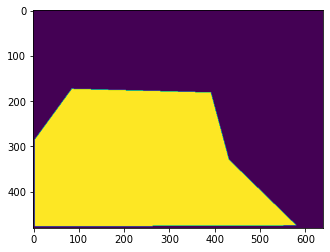

In [163]:
imgplot = plt.imshow(images['BW'])
images['BW'].shape

<function matplotlib.pyplot.show(close=None, block=None)>

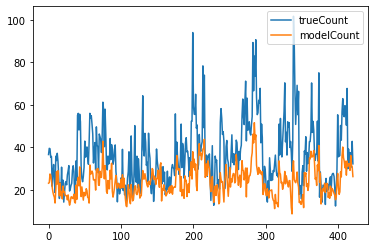

In [156]:
gt_results = loadmat('./TRANCOS_v3/results/results.mat')
# X = range(0,421)
# Y = gt_results['trueCount'][0]
# # Y = range(0, 130)

plt.plot(X, gt_results['trueCount'][0], label='trueCount')
plt.plot(X, gt_results['model1Count'][0], label='modelCount')
plt.legend(loc='upper right')

plt.show

# plt.plot(X, gt_results['trueCount'][0])
# plt.plot(X, gt_results[''])

In [132]:
output_density = loadmat('./TRANCOS_v3/results/output_densities/image001.mat')

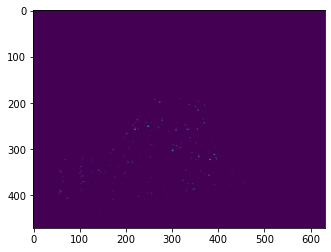

In [133]:
plt.imshow(output_density['estDensity_ROI'])

(471, 631)

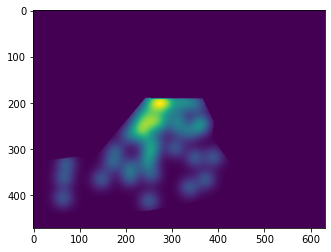

In [157]:
plt.imshow(output_density['gt'])
output_density['gt'].shape

In [121]:
feature_test = loadmat('./TRANCOS_v3/results/features_test.mat')

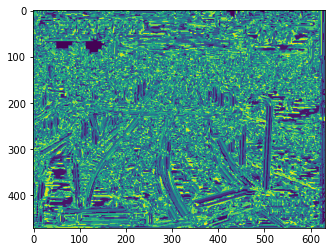

In [122]:
plt.imshow(feature_test['features'][0][0])

In [127]:
feature_test['features'][0][0].shape

(471, 631)

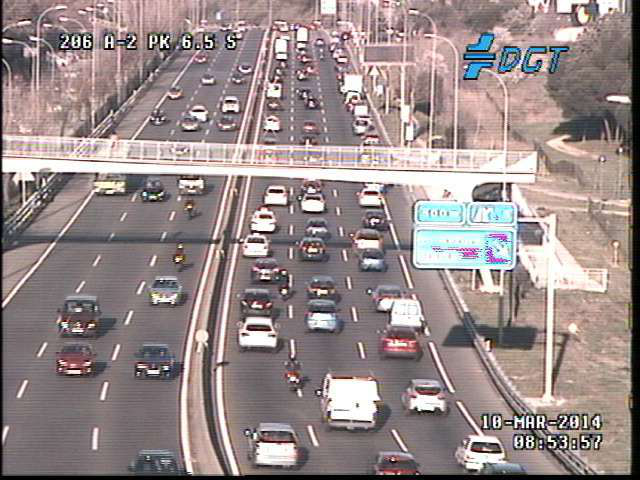

In [164]:
origin_img = PIL.Image.open("./TRANCOS_v3/images/image-1-000001.jpg")
origin_img

In [162]:
model = loadmat('./TRANCOS_v3/results/model.mat')
model

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 22 21:40:52 2015',
 '__version__': '1.0',
 '__globals__': [],
 'wL1': array([[1.14632060e-13],
        [1.63478328e-13],
        [1.41287102e-14],
        ...,
        [2.19111486e-14],
        [9.66856401e-14],
        [3.75110180e-14]])}

# WebCamT

In [176]:
import xmltodict
import json

In [177]:
# Readxml = parse('./WebCamT/164/164-20160223-09/000001.xml')
with open('./WebCamT/164/164-20160223-09/000001.xml', 'rt', encoding="UTF-8") as f:
	#json 모양으로 변환
    doc = xmltodict.parse(f.read())
json_data = json.loads(json.dumps(doc))

In [178]:
json_data

{'annotation': {'video': '164-20160223-09.avi',
  'frame': '000001',
  'time': '2016/02/23 09:30:36',
  'width': '352',
  'height': '240',
  'weather': '1',
  'facing': '3',
  'flow': '2',
  'vehicle': [{'id': '1',
    'bndbox': {'xmax': '353', 'xmin': '251', 'ymax': '227', 'ymin': '156'},
    'type': '6',
    'direction': '4',
    'previous': '0'},
   {'id': '2',
    'bndbox': {'xmax': '353', 'xmin': '322', 'ymax': '241', 'ymin': '211'},
    'type': '3',
    'direction': '4',
    'previous': '0'},
   {'id': '3',
    'bndbox': {'xmax': '255', 'xmin': '189', 'ymax': '241', 'ymin': '233'},
    'type': '3',
    'direction': '4',
    'previous': '0'},
   {'id': '4',
    'bndbox': {'xmax': '221', 'xmin': '94', 'ymax': '241', 'ymin': '196'},
    'type': '7',
    'direction': '4',
    'previous': '0'},
   {'id': '5',
    'bndbox': {'xmax': '206', 'xmin': '107', 'ymax': '210', 'ymin': '165'},
    'type': '7',
    'direction': '4',
    'previous': '0'},
   {'id': '6',
    'bndbox': {'xmax': '68

In [31]:
test_list, train_list=[], []
f = open("./CityCam/train_test_separation/Downtown_Test.txt", 'r')
while True:
    line = f.readline()
    if not line: break
    test_list.append(line.split('\n')[0])
f.close()

f = open("./CityCam/train_test_separation/Parkway_Test.txt", 'r')
while True:
    line = f.readline()
    if not line: break
    test_list.append(line.split('\n')[0])
f.close()

f = open("./CityCam/train_test_separation/Downtown_Train.txt", 'r')
while True:
    line = f.readline()
    if not line: break
    train_list.append(line.split('\n')[0])
f.close()

f = open("./CityCam/train_test_separation/Parkway_Train.txt", 'r')
while True:
    line = f.readline()
    if not line: break
    train_list.append(line.split('\n')[0])
f.close()

In [38]:
total_test, total_train =0, 0

for dir in test_list:
    total_test += len(fnmatch.filter(os.listdir('./CityCam/'+str(dir.split('-')[0])+'/'+dir), '*.jpg'))
    
for dir in train_list:
    total_train += len(fnmatch.filter(os.listdir('./CityCam/'+str(dir.split('-')[0])+'/'+dir), '*.jpg'))
    
print("total_test : "+str(total_test)+'\n'+"total_train : "+str(total_train))

total_test : 17788
total_train : 38147


In [39]:
print(str(total_test+total_train))

55935


In [40]:
# loading the image
img = PIL.Image.open("./CityCam/164/164-20160223-09_msk.png")
  
# fetching the dimensions
wid, hgt = img.size

# displaying the dimensions
print(str(wid) + "x" + str(hgt))

352x240
